In [116]:
import polars as pl

In [117]:
df = pl.read_csv("../data/filtered/movies.csv")
df.head()

movie_id,original_id,name,date,tagline,description,minute,theatrical_release_age_rating,rating
i64,i64,str,i64,str,str,i64,str,f64
0,1000001,"""Barbie""",2023,"""She's everything. He's just Ke…","""Barbie and Ken are having the …",114,"""PG-13""",3.86
1,1000004,"""Fight Club""",1999,"""Mischief. Mayhem. Soap.""","""A ticking-time-bomb insomniac …",139,"""R""",4.27
2,1000006,"""Oppenheimer""",2023,"""The world forever changes.""","""The story of J. Robert Oppenhe…",181,"""R""",4.23
3,1000008,"""Joker""",2019,"""Put on a happy face.""","""During the 1980s, a failed sta…",122,"""R""",3.85
4,1000010,"""Pulp Fiction""",1994,"""Just because you are a charact…","""A burger-loving hit man, his p…",154,"""R""",4.26


In [118]:
df.row(1)

(1,
 1000004,
 'Fight Club',
 1999,
 'Mischief. Mayhem. Soap.',
 'A ticking-time-bomb insomniac and a slippery soap salesman channel primal male aggression into a shocking new form of therapy. Their concept catches on, with underground "fight clubs" forming in every town, until an eccentric gets in the way and ignites an out-of-control spiral toward oblivion.',
 139,
 'R',
 4.27)

In [119]:
import matplotlib.pyplot as plt
import numpy as np

def plot_distribution(df, column):
    target_column = df[column].to_numpy()

    plt.figure(figsize=(10, 6))
    plt.hist(target_column, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Movie {column}', fontsize=16, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.3)

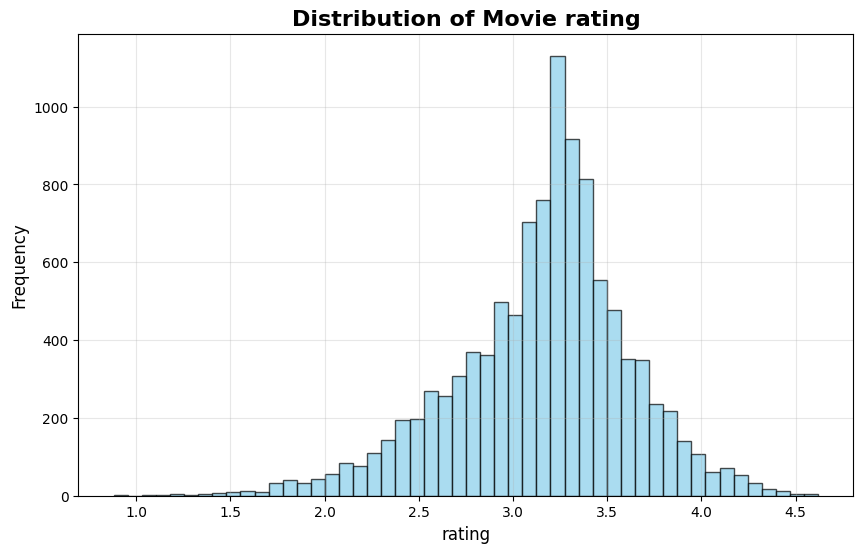

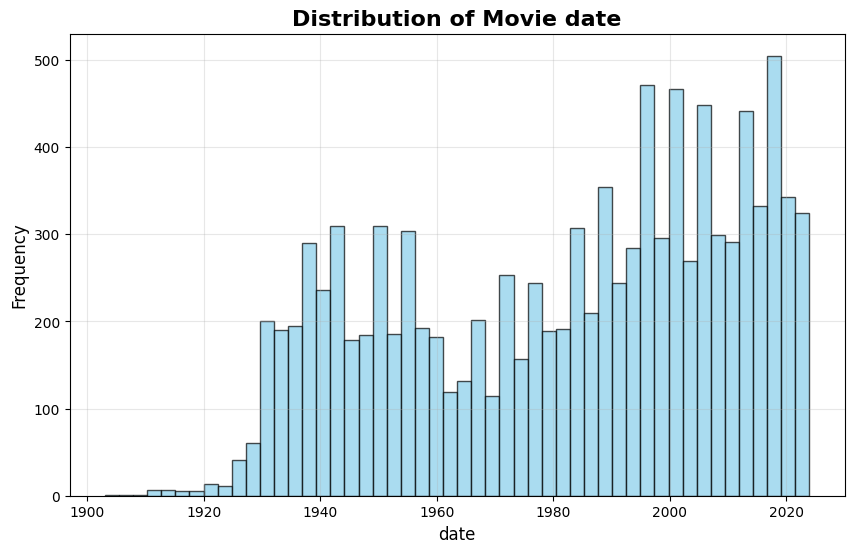

In [120]:
plot_distribution(df, 'rating')
plot_distribution(df, 'date')

In [121]:
YEAR_CUTOFF = 2015

In [122]:
print (f"Number of movies after {YEAR_CUTOFF}: {df['date'].gt(YEAR_CUTOFF).sum()}")
print (f"Mean of movies after {YEAR_CUTOFF}: {df.filter(pl.col('date') >= YEAR_CUTOFF)['rating'].mean()}")
print (f"Mean of movies before {YEAR_CUTOFF}: {df.filter(pl.col('date') < YEAR_CUTOFF)['rating'].mean()}")

Number of movies after 2015: 1350
Mean of movies after 2015: 2.930790697674419
Mean of movies before 2015: 3.1900692764460086


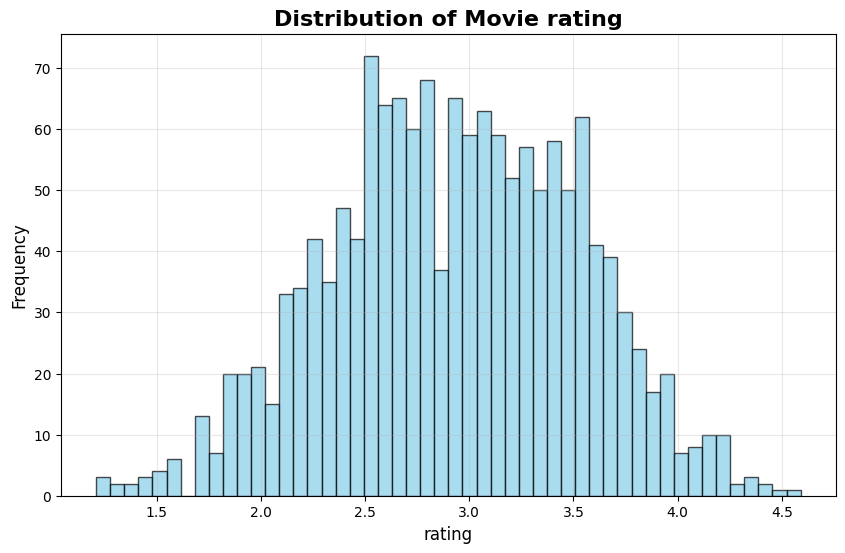

In [123]:
plot_distribution(df.filter(pl.col('date') >= YEAR_CUTOFF), 'rating')

In [124]:
unique_values = df['theatrical_release_age_rating'].unique().sort()
print("Unique age ratings:")
print(unique_values)

Unique age ratings:
shape: (7,)
Series: 'theatrical_release_age_rating' [str]
[
	null
	"G"
	"NC-17"
	"NR"
	"PG"
	"PG-13"
	"R"
]


In [125]:
correlations = df.select([
    pl.corr('rating', 'date').alias('rating_date_corr')
])

print(correlations)


shape: (1, 1)
┌──────────────────┐
│ rating_date_corr │
│ ---              │
│ f64              │
╞══════════════════╡
│ -0.347576        │
└──────────────────┘


### EDA conclusion:
- imbalanced dataset with dominance of 3.-3.5 ratings
- **after cut off year (2015)** there is enough new movies with various ratings that would make use for validation dataset as we want to predict ratings of NEW movies, not just any movie from the past
- no information about how many users rated movie, which explains that probably older movies are viewed by a broader audience and have slightly higher mean rating
- age rating ideally to be converted to numerical value to show order, but we will skip it
- no important features such as actor popularity, director/studio previous movie ratings, etc.

# XGBoost model

[CatBoost](https://github.com/catboost/catboost) is selected for implementation as it natively supports both numerical and Categorical features to make preprocessing and handling easy to use and prototype, also easier to install than LightGBM.

In [126]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from catboost import CatBoostRegressor

In [127]:
# Basic feature engineering and filling missing values
df = df.with_columns([
    pl.col('theatrical_release_age_rating').fill_null('Empty').alias('theatrical_release_age_rating')
])

# Name, tagline and description length and word count
df = df.with_columns([
    pl.col('name').str.len_chars().alias('name_length'),
    pl.col('tagline').str.len_chars().alias('tagline_length'),
    pl.col('tagline').str.split(' ').list.len().alias('tagline_word_count'),
    pl.col('description').str.len_chars().alias('description_length'),
    pl.col('description').str.split(' ').list.len().alias('description_word_count'),

])


In [159]:
# Load directors and actors data for feature engineering
directors_df = pl.read_csv("../data/filtered/directors.csv")
actors_df = pl.read_csv("../data/filtered/actors.csv")

print(f"Directors data shape: {directors_df.shape}")
print(f"Actors data shape: {actors_df.shape}")
print(f"Movies data shape: {df.shape}")

# Preview the additional datasets
print("\nDirectors data sample:")
print(directors_df.head())
print("\nActors data sample:")
print(actors_df.head())


Directors data shape: (5390, 3)
Actors data shape: (156070, 3)
Movies data shape: (10599, 14)

Directors data sample:
shape: (5, 3)
┌──────────┬─────────────┬───────────────────┐
│ movie_id ┆ original_id ┆ director_name     │
│ ---      ┆ ---         ┆ ---               │
│ i64      ┆ i64         ┆ str               │
╞══════════╪═════════════╪═══════════════════╡
│ 1        ┆ 1000004     ┆ David Fincher     │
│ 2        ┆ 1000006     ┆ Christopher Nolan │
│ 3        ┆ 1000008     ┆ Todd Phillips     │
│ 4        ┆ 1000010     ┆ Quentin Tarantino │
│ 8        ┆ 1000017     ┆ Christopher Nolan │
└──────────┴─────────────┴───────────────────┘

Actors data sample:
shape: (5, 3)
┌──────────┬─────────────┬───────────────────┐
│ movie_id ┆ original_id ┆ actor_name        │
│ ---      ┆ ---         ┆ ---               │
│ i64      ┆ i64         ┆ str               │
╞══════════╪═════════════╪═══════════════════╡
│ 0        ┆ 1000001     ┆ Margot Robbie     │
│ 0        ┆ 1000001     ┆ Ryan Go

In [ ]:
# Feature Engineering: Directors and Actors Analysis

# Director-based features
print("=== DIRECTOR FEATURES ===")

# Calculate director statistics (average rating, movie count, etc.)
director_stats = (
    df.join(directors_df, on="movie_id", how="inner")
    .group_by("director_name")
    .agg([
        pl.count("movie_id").alias("director_movie_count"),
        pl.mean("rating").alias("director_avg_rating"),
        pl.std("rating").alias("director_rating_std"),
        pl.min("date").alias("director_first_movie_year"),
        pl.max("date").alias("director_last_movie_year"),
    ])
    .with_columns([
        # Calculate director's number of years since first movie
        (pl.col("director_last_movie_year") - pl.col("director_first_movie_year")).alias("director_career_span"),
        # Fill null std with 0 (for directors with only one movie)
        pl.col("director_rating_std").fill_null(0.0),
    ])
)

print(f"Number of unique directors: {len(director_stats)}")
print("Top directors by movie count:")
print(director_stats.sort("director_movie_count", descending=True).head(10))

print("\nTop directors by average rating (min 3 movies):")
print(director_stats.filter(pl.col("director_movie_count") >= 3).sort("director_avg_rating", descending=True).head(10))

# actor-based features  
print("\n=== ACTOR FEATURES ===")

# Calculate actor statistics
actor_stats = (
    df.join(actors_df, on="movie_id", how="inner")
    .group_by("actor_name")
    .agg([
        pl.count("movie_id").alias("actor_movie_count"),
        pl.mean("rating").alias("actor_avg_rating"),
        pl.std("rating").alias("actor_rating_std"),
        pl.min("date").alias("actor_first_movie_year"),
        pl.max("date").alias("actor_last_movie_year"),
    ])
    .with_columns([
        (pl.col("actor_last_movie_year") - pl.col("actor_first_movie_year")).alias("actor_career_span"),
        pl.col("actor_rating_std").fill_null(0.0),
    ])
)

print(f"Number of unique actors: {len(actor_stats)}")
print("Top actors by movie count:")
print(actor_stats.sort("actor_movie_count", descending=True).head(10))

print("\nTop actors by average rating (min 5 movies):")
print(actor_stats.filter(pl.col("actor_movie_count") >= 5).sort("actor_avg_rating", descending=True).head(10))


=== DIRECTOR FEATURES ===
Number of unique directors: 450
Top directors by movie count:
shape: (10, 7)
┌──────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ director_nam ┆ director_mo ┆ director_av ┆ director_ra ┆ director_fi ┆ director_la ┆ director_ca │
│ e            ┆ vie_count   ┆ g_rating    ┆ ting_std    ┆ rst_movie_y ┆ st_movie_ye ┆ reer_span   │
│ ---          ┆ ---         ┆ ---         ┆ ---         ┆ ear         ┆ ar          ┆ ---         │
│ str          ┆ u32         ┆ f64         ┆ f64         ┆ ---         ┆ ---         ┆ i64         │
│              ┆             ┆             ┆             ┆ i64         ┆ i64         ┆             │
╞══════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ Michael      ┆ 66          ┆ 3.363333    ┆ 0.245572    ┆ 1928        ┆ 1961        ┆ 33          │
│ Curtiz       ┆             ┆             ┆             ┆             ┆             ┆   

In [ ]:
# Create movie-level aggregated features from directors and actors

print("=== CREATING MOVIE-LEVEL FEATURES ===")

movie_director_features = (
    directors_df
    .join(director_stats, on="director_name", how="left")
    .group_by("movie_id")
    .agg([
        # Director count per movie
        pl.count("director_name").alias("num_directors"),
        
        # Average director statistics
        pl.mean("director_movie_count").alias("avg_director_experience"),
        pl.mean("director_avg_rating").alias("avg_director_rating"),
        pl.mean("director_rating_std").alias("avg_director_consistency"),
        pl.mean("director_career_span").alias("avg_director_career_span"),
        
        # Max director statistics (best director on the movie)
        pl.max("director_movie_count").alias("max_director_experience"),
        pl.max("director_avg_rating").alias("max_director_rating"),
        pl.min("director_rating_std").alias("best_director_consistency"),
        
        # Check if movie has A-list directors (>= 10 movies)
        (pl.col("director_movie_count") >= 10).any().alias("has_experienced_director"),
        
        # Check if movie has high-rated directors (avg rating >= 4.0)
        (pl.col("director_avg_rating") >= 4.0).any().alias("has_acclaimed_director"),
    ])
    .with_columns([
        # Fill nulls with appropriate defaults
        pl.col("avg_director_experience").fill_null(1.0),
        pl.col("avg_director_rating").fill_null(3.0),  # median rating
        pl.col("avg_director_consistency").fill_null(0.5),
        pl.col("avg_director_career_span").fill_null(0.0),
        pl.col("max_director_experience").fill_null(1.0),
        pl.col("max_director_rating").fill_null(3.0),
        pl.col("best_director_consistency").fill_null(0.5),
    ])
)

print(f"Movie director features shape: {movie_director_features.shape}")
print("Sample movie director features:")
print(movie_director_features.head())

#  actor features per movie
movie_actor_features = (
    actors_df
    .join(actor_stats, on="actor_name", how="left")
    .group_by("movie_id")
    .agg([
        # Actor count per movie
        pl.count("actor_name").alias("num_actors"),
        
        # Average actor statistics
        pl.mean("actor_movie_count").alias("avg_actor_experience"),
        pl.mean("actor_avg_rating").alias("avg_actor_rating"),
        pl.mean("actor_rating_std").alias("avg_actor_consistency"),
        pl.mean("actor_career_span").alias("avg_actor_career_span"),
        
        # Max actor statistics (best/most experienced actor)
        pl.max("actor_movie_count").alias("max_actor_experience"),
        pl.max("actor_avg_rating").alias("max_actor_rating"),
        pl.min("actor_rating_std").alias("best_actor_consistency"),
        
        # Check if movie has A-list actors (>= 15 movies)
        (pl.col("actor_movie_count") >= 15).any().alias("has_experienced_actor"),
        
        # Check if movie has high-rated actors (avg rating >= 4.0)
        (pl.col("actor_avg_rating") >= 4.0).any().alias("has_acclaimed_actor"),
        
        # Count A-list actors
        (pl.col("actor_movie_count") >= 15).sum().alias("num_experienced_actors"),
        
        # Count acclaimed actors  
        (pl.col("actor_avg_rating") >= 4.0).sum().alias("num_acclaimed_actors"),
    ])
    .with_columns([
        # Fill nulls with appropriate defaults
        pl.col("avg_actor_experience").fill_null(1.0),
        pl.col("avg_actor_rating").fill_null(3.0),
        pl.col("avg_actor_consistency").fill_null(0.5),
        pl.col("avg_actor_career_span").fill_null(0.0),
        pl.col("max_actor_experience").fill_null(1.0),
        pl.col("max_actor_rating").fill_null(3.0),
        pl.col("best_actor_consistency").fill_null(0.5),
        pl.col("num_experienced_actors").fill_null(0),
        pl.col("num_acclaimed_actors").fill_null(0),
    ])
)

print(f"\nMovie actor features shape: {movie_actor_features.shape}")
print("Sample movie actor features:")
print(movie_actor_features.head())


=== CREATING MOVIE-LEVEL FEATURES ===
Movie director features shape: (5265, 11)
Sample movie director features:
shape: (5, 11)
┌──────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ movie_id ┆ num_direc ┆ avg_direc ┆ avg_direc ┆ … ┆ max_direc ┆ best_dire ┆ has_exper ┆ has_accla │
│ ---      ┆ tors      ┆ tor_exper ┆ tor_ratin ┆   ┆ tor_ratin ┆ ctor_cons ┆ ienced_di ┆ imed_dire │
│ i64      ┆ ---       ┆ ience     ┆ g         ┆   ┆ g         ┆ istency   ┆ rector    ┆ ctor      │
│          ┆ u32       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│          ┆           ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ bool      ┆ bool      │
╞══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 950      ┆ 1         ┆ 9.0       ┆ 2.941111  ┆ … ┆ 2.941111  ┆ 0.25556   ┆ false     ┆ false     │
│ 6732     ┆ 1         ┆ 30.0      ┆ 3.151333  ┆ … ┆ 3.151333  ┆ 

In [162]:
# Join all features with the main dataset
print("=== JOINING FEATURES TO MAIN DATASET ===")

# Join director and actor features to main dataset
df_enhanced = (
    df
    .join(movie_director_features, on="movie_id", how="left")
    .join(movie_actor_features, on="movie_id", how="left")
)

# Fill any remaining nulls for movies without director/actor data
director_feature_cols = [col for col in movie_director_features.columns if col != "movie_id"]
actor_feature_cols = [col for col in movie_actor_features.columns if col != "movie_id"]

# Fill nulls with sensible defaults
df_enhanced = df_enhanced.with_columns([
    # Director features defaults
    pl.col("num_directors").fill_null(1),
    pl.col("avg_director_experience").fill_null(1.0),
    pl.col("avg_director_rating").fill_null(3.0),
    pl.col("avg_director_consistency").fill_null(0.5),
    pl.col("avg_director_career_span").fill_null(0.0),
    pl.col("max_director_experience").fill_null(1.0),
    pl.col("max_director_rating").fill_null(3.0),
    pl.col("best_director_consistency").fill_null(0.5),
    pl.col("has_experienced_director").fill_null(False),
    pl.col("has_acclaimed_director").fill_null(False),
    
    # Actor features defaults
    pl.col("num_actors").fill_null(5),  # average cast size
    pl.col("avg_actor_experience").fill_null(1.0),
    pl.col("avg_actor_rating").fill_null(3.0),
    pl.col("avg_actor_consistency").fill_null(0.5),
    pl.col("avg_actor_career_span").fill_null(0.0),
    pl.col("max_actor_experience").fill_null(1.0),
    pl.col("max_actor_rating").fill_null(3.0),
    pl.col("best_actor_consistency").fill_null(0.5),
    pl.col("has_experienced_actor").fill_null(False),
    pl.col("has_acclaimed_actor").fill_null(False),
    pl.col("num_experienced_actors").fill_null(0),
    pl.col("num_acclaimed_actors").fill_null(0),
])

print(f"Enhanced dataset shape: {df_enhanced.shape}")
print(f"Original dataset shape: {df.shape}")
print(f"Added {df_enhanced.shape[1] - df.shape[1]} new features")

print("\nNew features added:")
new_features = director_feature_cols + actor_feature_cols
for feature in new_features:
    print(f"  - {feature}")

print(f"\nSample of enhanced dataset:")
print(df_enhanced.select(['name', 'rating'] + new_features[:5]).head())


=== JOINING FEATURES TO MAIN DATASET ===
Enhanced dataset shape: (10599, 36)
Original dataset shape: (10599, 14)
Added 22 new features

New features added:
  - num_directors
  - avg_director_experience
  - avg_director_rating
  - avg_director_consistency
  - avg_director_career_span
  - max_director_experience
  - max_director_rating
  - best_director_consistency
  - has_experienced_director
  - has_acclaimed_director
  - num_actors
  - avg_actor_experience
  - avg_actor_rating
  - avg_actor_consistency
  - avg_actor_career_span
  - max_actor_experience
  - max_actor_rating
  - best_actor_consistency
  - has_experienced_actor
  - has_acclaimed_actor
  - num_experienced_actors
  - num_acclaimed_actors

Sample of enhanced dataset:
shape: (5, 7)
┌──────────────┬────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┐
│ name         ┆ rating ┆ num_director ┆ avg_director ┆ avg_director ┆ avg_director ┆ avg_director │
│ ---          ┆ ---    ┆ s            ┆ _exp

In [163]:
# Create additional meaningful interaction and derived features
print("=== CREATING INTERACTION AND DERIVED FEATURES ===")

df_enhanced = df_enhanced.with_columns([
    # Interaction features
    (pl.col("avg_director_rating") * pl.col("avg_actor_rating")).alias("director_actor_rating_interaction"),
    (pl.col("max_director_rating") * pl.col("max_actor_rating")).alias("best_talent_rating_interaction"),
    
    # Combined experience features
    (pl.col("avg_director_experience") + pl.col("avg_actor_experience")).alias("combined_experience"),
    (pl.col("max_director_experience") + pl.col("max_actor_experience")).alias("max_combined_experience"),
    
    # Star power features (combining various indicators)
    (pl.col("num_experienced_actors") + pl.col("num_acclaimed_actors") + 
     pl.col("has_experienced_director").cast(pl.Int32) + pl.col("has_acclaimed_director").cast(pl.Int32)).alias("total_star_power"),
    
    # Ratio features
    (pl.col("num_experienced_actors") / pl.col("num_actors")).alias("experienced_actor_ratio"),
    (pl.col("num_acclaimed_actors") / pl.col("num_actors")).alias("acclaimed_actor_ratio"),
    
    # Consistency indicators (lower std = more consistent)
    (1.0 / (pl.col("avg_director_consistency") + 0.1)).alias("director_consistency_score"),
    (1.0 / (pl.col("avg_actor_consistency") + 0.1)).alias("actor_consistency_score"),
    
    # Career momentum (recent vs older directors/actors)
    (2024 - pl.col("date")).alias("years_since_release"),
    
    # A-list movie indicator (multiple criteria)
    ((pl.col("has_experienced_director") | pl.col("has_acclaimed_director")) & 
     (pl.col("num_experienced_actors") >= 2)).alias("is_alist_movie"),
     
    # Quality ensemble indicator
    ((pl.col("avg_director_rating") >= 3.5) & (pl.col("avg_actor_rating") >= 3.5)).alias("quality_ensemble"),
])

# Add these new features to numerical features list
interaction_features = [
    'director_actor_rating_interaction', 'best_talent_rating_interaction',
    'combined_experience', 'max_combined_experience', 'total_star_power',
    'experienced_actor_ratio', 'acclaimed_actor_ratio',
    'director_consistency_score', 'actor_consistency_score',
    'years_since_release'
]

# Add these new features to categorical features list  
interaction_categorical = ['is_alist_movie', 'quality_ensemble']

print(f"Added {len(interaction_features)} interaction numerical features")
print(f"Added {len(interaction_categorical)} interaction categorical features")

print("\nCorrelations of interaction features with rating:")
for feature in interaction_features[:5]:  # Show first 5
    corr = df_enhanced.select([pl.corr('rating', feature).alias(f'{feature}_corr')]).item()
    print(f"{feature}: {corr:.3f}")

print(f"\nSample of interaction features:")
sample_cols = ['name', 'rating'] + interaction_features[:3] + interaction_categorical
print(df_enhanced.select(sample_cols).head())


=== CREATING INTERACTION AND DERIVED FEATURES ===
Added 10 interaction numerical features
Added 2 interaction categorical features

Correlations of interaction features with rating:
director_actor_rating_interaction: 0.598
best_talent_rating_interaction: 0.564
combined_experience: 0.298
max_combined_experience: 0.244
total_star_power: 0.247

Sample of interaction features:
shape: (5, 7)
┌──────────────┬────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┐
│ name         ┆ rating ┆ director_act ┆ best_talent_ ┆ combined_exp ┆ is_alist_mov ┆ quality_ense │
│ ---          ┆ ---    ┆ or_rating_in ┆ rating_inter ┆ erience      ┆ ie           ┆ mble         │
│ str          ┆ f64    ┆ teract…      ┆ action       ┆ ---          ┆ ---          ┆ ---          │
│              ┆        ┆ ---          ┆ ---          ┆ f64          ┆ bool         ┆ bool         │
│              ┆        ┆ f64          ┆ f64          ┆              ┆              ┆              │
╞═══

In [164]:
df.head()

movie_id,original_id,name,date,tagline,description,minute,theatrical_release_age_rating,rating,name_length,tagline_length,tagline_word_count,description_length,description_word_count
i64,i64,str,i64,str,str,i64,str,f64,u32,u32,u32,u32,u32
0,1000001,"""Barbie""",2023,"""She's everything. He's just Ke…","""Barbie and Ken are having the …",114,"""PG-13""",3.86,6,32,5,229,43
1,1000004,"""Fight Club""",1999,"""Mischief. Mayhem. Soap.""","""A ticking-time-bomb insomniac …",139,"""R""",4.27,10,23,3,295,45
2,1000006,"""Oppenheimer""",2023,"""The world forever changes.""","""The story of J. Robert Oppenhe…",181,"""R""",4.23,11,26,4,100,18
3,1000008,"""Joker""",2019,"""Put on a happy face.""","""During the 1980s, a failed sta…",122,"""R""",3.85,5,20,5,169,29
4,1000010,"""Pulp Fiction""",1994,"""Just because you are a charact…","""A burger-loving hit man, his p…",154,"""R""",4.26,12,65,11,239,36


In [165]:
# Update the dataset to use enhanced version with all new features
df = df_enhanced

# Identify categorical features (including boolean features from directors/actors)
categorical_features = [
    'theatrical_release_age_rating',
    'has_experienced_director', 
    'has_acclaimed_director',
    'has_experienced_actor',
    'has_acclaimed_actor',
    'is_alist_movie',
    'quality_ensemble'
]

# Numerical features (original + director/actor + interaction features)
numerical_features = [
    # Original features
    'date', 'minute', 'name_length', 'tagline_length', 'description_length', 
    'tagline_word_count', 'description_word_count',
    
    # Director features
    'num_directors', 'avg_director_experience', 'avg_director_rating', 
    'avg_director_consistency', 'avg_director_career_span',
    'max_director_experience', 'max_director_rating', 'best_director_consistency',
    
    # Actor features  
    'num_actors', 'avg_actor_experience', 'avg_actor_rating',
    'avg_actor_consistency', 'avg_actor_career_span',
    'max_actor_experience', 'max_actor_rating', 'best_actor_consistency',
    'num_experienced_actors', 'num_acclaimed_actors',
    
    # Interaction and derived features
    'director_actor_rating_interaction', 'best_talent_rating_interaction',
    'combined_experience', 'max_combined_experience', 'total_star_power',
    'experienced_actor_ratio', 'acclaimed_actor_ratio',
    'director_consistency_score', 'actor_consistency_score',
    'years_since_release'
]

print(f"Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"Total features: {len(categorical_features) + len(numerical_features)}")

# Show correlation of key new features with rating
print(f"\n=== KEY FEATURE CORRELATIONS WITH RATING ===")
key_features = [
    'avg_director_rating', 'max_director_rating', 'avg_actor_rating', 'max_actor_rating',
    'director_actor_rating_interaction', 'best_talent_rating_interaction',
    'total_star_power', 'experienced_actor_ratio', 'combined_experience'
]

for feature in key_features:
    corr = df.select([pl.corr('rating', feature).alias(f'{feature}_corr')]).item()
    print(f"{feature}: {corr:.3f}")

print(f"\nFinal enhanced dataset shape: {df.shape}")
print("Sample of final enhanced dataset:")
sample_cols = ['name', 'rating', 'avg_director_rating', 'total_star_power', 'is_alist_movie']
print(df.select(sample_cols).head())

Categorical features (7): ['theatrical_release_age_rating', 'has_experienced_director', 'has_acclaimed_director', 'has_experienced_actor', 'has_acclaimed_actor', 'is_alist_movie', 'quality_ensemble']
Numerical features (35): ['date', 'minute', 'name_length', 'tagline_length', 'description_length', 'tagline_word_count', 'description_word_count', 'num_directors', 'avg_director_experience', 'avg_director_rating', 'avg_director_consistency', 'avg_director_career_span', 'max_director_experience', 'max_director_rating', 'best_director_consistency', 'num_actors', 'avg_actor_experience', 'avg_actor_rating', 'avg_actor_consistency', 'avg_actor_career_span', 'max_actor_experience', 'max_actor_rating', 'best_actor_consistency', 'num_experienced_actors', 'num_acclaimed_actors', 'director_actor_rating_interaction', 'best_talent_rating_interaction', 'combined_experience', 'max_combined_experience', 'total_star_power', 'experienced_actor_ratio', 'acclaimed_actor_ratio', 'director_consistency_score', 

## Train-val split based on YEAR_CUTOFF

In [166]:
def split_data(df, categorical_features, numerical_features, YEAR_CUTOFF, drop_percentage=0.5):
    """
    Split data into train/validation sets with balanced rating distribution.
    
    Args:
        df: Input dataframe
        categorical_features: List of categorical feature names
        numerical_features: List of numerical feature names
        YEAR_CUTOFF: Year threshold for train/val split
        drop_percentage: Percentage of records to drop from rating range 3.0-3.5 (default: 0.5)
    
    Returns:
        X_train, y_train, X_val, y_val: Training and validation features and targets
    """
    # Initial split by year
    df_train_initial = df.filter(pl.col('date') < YEAR_CUTOFF)
    df_val_initial = df.filter(pl.col('date') >= YEAR_CUTOFF)
    
    # Function to balance data by dropping percentage of 3.0-3.5 ratings
    def balance_ratings(df_subset, drop_pct, seed=42):
        # Separate data into rating ranges
        rating_3_to_35 = df_subset.filter((pl.col('rating') >= 3.0) & (pl.col('rating') <= 3.5))
        rating_other = df_subset.filter((pl.col('rating') < 3.0) | (pl.col('rating') > 3.5))
        
        print(f"Original count in 3.0-3.5 range: {len(rating_3_to_35)}")
        print(f"Original count outside 3.0-3.5 range: {len(rating_other)}")
        
        # Sample from 3.0-3.5 range (keep 1 - drop_pct)
        if len(rating_3_to_35) > 0:
            keep_count = int(len(rating_3_to_35) * (1 - drop_pct))
            rating_3_to_35_sampled = rating_3_to_35.sample(n=keep_count, seed=seed)
            print(f"Keeping {keep_count} records from 3.0-3.5 range ({(1-drop_pct)*100:.1f}%)")
        else:
            rating_3_to_35_sampled = rating_3_to_35
        
        # Combine back together
        balanced_df = pl.concat([rating_3_to_35_sampled, rating_other])
        return balanced_df
    
    # Balance both train and validation sets
    print("Balancing training set:")
    df_train = balance_ratings(df_train_initial, drop_percentage, seed=42)
    
    print("\nBalancing validation set:")
    df_val = balance_ratings(df_val_initial, drop_percentage, seed=43)
    
    # Create final train/val splits
    X_train = df_train.select(categorical_features + numerical_features).to_pandas()
    y_train = df_train.select('rating').to_numpy().flatten()

    X_val = df_val.select(categorical_features + numerical_features).to_pandas()
    y_val = df_val.select('rating').to_numpy().flatten()
    
    print(f"\nFinal training set size: {len(X_train)}")
    print(f"Final validation set size: {len(X_val)}")
    
    return X_train, y_train, X_val, y_val

In [167]:
# Analyze rating distribution before balancing
def analyze_rating_distribution(df, title):
    """Analyze and display rating distribution statistics."""
    print(f"\n=== {title} ===")
    total_count = len(df)
    
    # Count ratings in different ranges
    rating_3_to_35 = df.filter((pl.col('rating') >= 2.7) & (pl.col('rating') <= 3.7))
    rating_low = df.filter(pl.col('rating') < 2.7)
    rating_high = df.filter(pl.col('rating') > 3.7)
    
    print(f"Total records: {total_count}")
    print(f"Ratings < 3.0: {len(rating_low)} ({len(rating_low)/total_count*100:.1f}%)")
    print(f"Ratings 3.0-3.5: {len(rating_3_to_35)} ({len(rating_3_to_35)/total_count*100:.1f}%)")
    print(f"Ratings > 3.5: {len(rating_high)} ({len(rating_high)/total_count*100:.1f}%)")
    
    return len(rating_3_to_35), len(rating_low), len(rating_high)

# Analyze original distribution
print("ORIGINAL DATA DISTRIBUTION:")
df_train_orig = df.filter(pl.col('date') < YEAR_CUTOFF)
df_val_orig = df.filter(pl.col('date') >= YEAR_CUTOFF)

train_3_35_orig, train_low_orig, train_high_orig = analyze_rating_distribution(df_train_orig, "Training Set (Before Balancing)")
val_3_35_orig, val_low_orig, val_high_orig = analyze_rating_distribution(df_val_orig, "Validation Set (Before Balancing)")


ORIGINAL DATA DISTRIBUTION:

=== Training Set (Before Balancing) ===
Total records: 9094
Ratings < 3.0: 1119 (12.3%)
Ratings 3.0-3.5: 7077 (77.8%)
Ratings > 3.5: 898 (9.9%)

=== Validation Set (Before Balancing) ===
Total records: 1505
Ratings < 3.0: 550 (36.5%)
Ratings 3.0-3.5: 815 (54.2%)
Ratings > 3.5: 140 (9.3%)


In [168]:
# Create balanced train-validation split dropping 50% of 3.0-3.5 ratings
X_train, y_train, X_val, y_val = split_data(df, categorical_features, numerical_features, YEAR_CUTOFF, drop_percentage=0.5)

Balancing training set:
Original count in 3.0-3.5 range: 4877
Original count outside 3.0-3.5 range: 4217
Keeping 2438 records from 3.0-3.5 range (50.0%)

Balancing validation set:
Original count in 3.0-3.5 range: 421
Original count outside 3.0-3.5 range: 1084
Keeping 210 records from 3.0-3.5 range (50.0%)

Final training set size: 6655
Final validation set size: 1294


In [169]:
# Analyze distribution after balancing
print("\n" + "="*60)
print("BALANCED DATA DISTRIBUTION:")

# Create dataframes from the balanced splits for analysis
df_train_balanced = pl.DataFrame({
    'rating': y_train
})
df_val_balanced = pl.DataFrame({
    'rating': y_val
})

train_3_35_balanced, train_low_balanced, train_high_balanced = analyze_rating_distribution(df_train_balanced, "Training Set (After Balancing)")
val_3_35_balanced, val_low_balanced, val_high_balanced = analyze_rating_distribution(df_val_balanced, "Validation Set (After Balancing)")

# Show the change
print(f"\n" + "="*60)
print("SUMMARY OF CHANGES:")
print(f"Training Set - 3.0-3.5 range: {train_3_35_orig} -> {train_3_35_balanced} (dropped {train_3_35_orig - train_3_35_balanced} records)")
print(f"Validation Set - 3.0-3.5 range: {val_3_35_orig} -> {val_3_35_balanced} (dropped {val_3_35_orig - val_3_35_balanced} records)")
print(f"Total reduction in 3.0-3.5 range: {(train_3_35_orig + val_3_35_orig) - (train_3_35_balanced + val_3_35_balanced)} records")



BALANCED DATA DISTRIBUTION:

=== Training Set (After Balancing) ===
Total records: 6655
Ratings < 3.0: 1119 (16.8%)
Ratings 3.0-3.5: 4638 (69.7%)
Ratings > 3.5: 898 (13.5%)

=== Validation Set (After Balancing) ===
Total records: 1294
Ratings < 3.0: 550 (42.5%)
Ratings 3.0-3.5: 604 (46.7%)
Ratings > 3.5: 140 (10.8%)

SUMMARY OF CHANGES:
Training Set - 3.0-3.5 range: 7077 -> 4638 (dropped 2439 records)
Validation Set - 3.0-3.5 range: 815 -> 604 (dropped 211 records)
Total reduction in 3.0-3.5 range: 2650 records


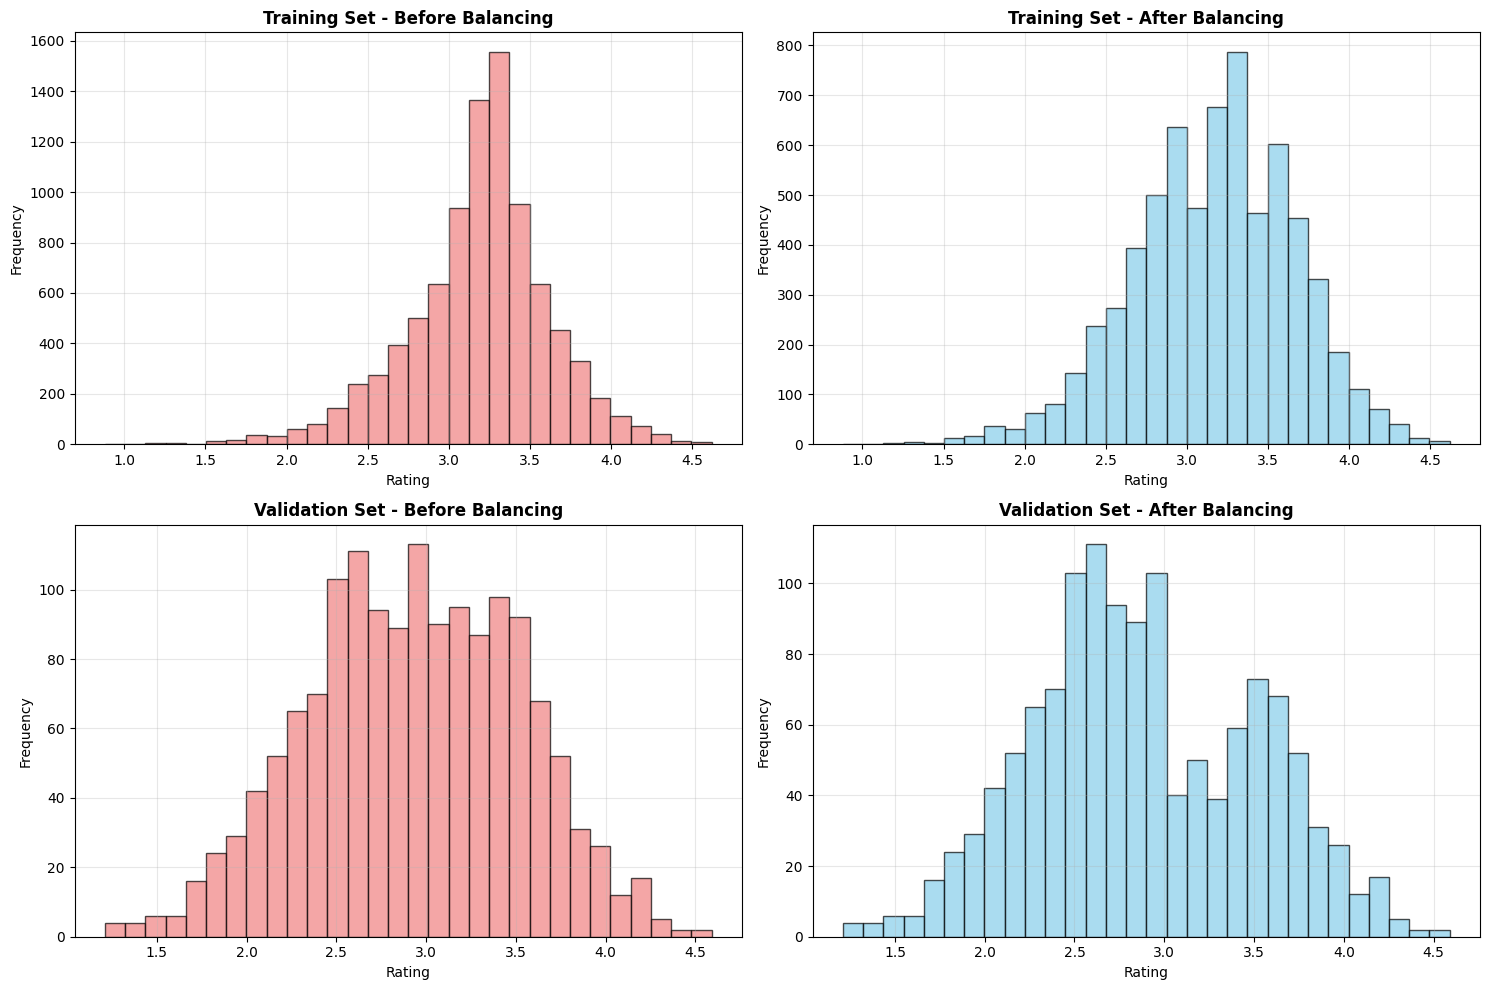

In [170]:
# Visualize the distribution comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Training set - before and after
axes[0, 0].hist(df_train_orig['rating'].to_numpy(), bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 0].set_title('Training Set - Before Balancing', fontweight='bold')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(y_train, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Training Set - After Balancing', fontweight='bold')
axes[0, 1].set_xlabel('Rating')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# Validation set - before and after
axes[1, 0].hist(df_val_orig['rating'].to_numpy(), bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Validation Set - Before Balancing', fontweight='bold')
axes[1, 0].set_xlabel('Rating')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(y_val, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 1].set_title('Validation Set - After Balancing', fontweight='bold')
axes[1, 1].set_xlabel('Rating')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [171]:
iterations = [100, 300, 500, 1000, 2000, 3000, 10000]
depths = [3, 5, 7]

rmse_results = []
best_rmse = float('inf')

best_params = {}
best_model = None
percentage_of_35_to_remove = 0.5
for iteration in iterations:
    for depth in depths: 
        catboost_model = CatBoostRegressor(
            iterations=iteration,
            depth=depth,
            learning_rate=0.1,
            l2_leaf_reg=3,
            random_seed=42,
            verbose=False
        )   

        catboost_model.fit(X_train, y_train, cat_features=categorical_features)

        y_pred = catboost_model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        print(f"Iteration: {iteration}, Depth: {depth}, RMSE: {rmse}")
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = catboost_model
            best_params = {
                'iteration': iteration,
                'depth': depth
            }

print(f"Best parameters: {best_params}")
print(f"Best RMSE: {best_rmse}")

Iteration: 100, Depth: 3, RMSE: 0.423107483656468
Iteration: 100, Depth: 5, RMSE: 0.41438449799436894
Iteration: 100, Depth: 7, RMSE: 0.4086214045823905
Iteration: 300, Depth: 3, RMSE: 0.4123158859091025
Iteration: 300, Depth: 5, RMSE: 0.40798203914717196
Iteration: 300, Depth: 7, RMSE: 0.4071253439899354
Iteration: 500, Depth: 3, RMSE: 0.4099589611986679
Iteration: 500, Depth: 5, RMSE: 0.41024335947707896
Iteration: 500, Depth: 7, RMSE: 0.4081616815178379
Iteration: 1000, Depth: 3, RMSE: 0.41253314539065694
Iteration: 1000, Depth: 5, RMSE: 0.4141200624946321
Iteration: 1000, Depth: 7, RMSE: 0.41178712824926794
Iteration: 2000, Depth: 3, RMSE: 0.418434661523089
Iteration: 2000, Depth: 5, RMSE: 0.41929087050504316
Iteration: 2000, Depth: 7, RMSE: 0.41476127578165806
Iteration: 3000, Depth: 3, RMSE: 0.42308340457193805
Iteration: 3000, Depth: 5, RMSE: 0.42212452628077335
Iteration: 3000, Depth: 7, RMSE: 0.41594539046713314
Iteration: 10000, Depth: 3, RMSE: 0.43906494042621197
Iteration: 

In [180]:
# Feature Importance Analysis
print("=== FEATURE IMPORTANCE ANALYSIS ===")

# Check if we have a trained model
if best_model is None:
    print("No trained model found. Please run the model training cell first.")
else:
    # Get feature importances from the best model
    feature_names = categorical_features + numerical_features
    feature_importances = best_model.get_feature_importance()

    # Create a dataframe for easier analysis
    importance_df = pl.DataFrame({
        'feature': feature_names,
        'importance': feature_importances
    }).sort('importance', descending=True)

    print(f"Top 20 Most Important Features:")
    print("="*50)
    top_20 = importance_df.head(20)
    for i, row in enumerate(top_20.iter_rows(named=True)):
        print(f"{i+1:2d}. {row['feature']:<30} {row['importance']:>8.2f}")

    print(f"\n=== FEATURE CATEGORY ANALYSIS ===")

    # Categorize features by type
    def categorize_feature(feature_name):
        if feature_name in ['date', 'minute', 'name_length', 'tagline_length', 'description_length', 'tagline_word_count', 'description_word_count']:
            return 'Original Movie Features'
        elif 'director' in feature_name:
            return 'Director Features'
        elif 'actor' in feature_name:
            return 'Actor Features'
        elif feature_name in ['director_actor_rating_interaction', 'best_talent_rating_interaction', 'combined_experience', 'max_combined_experience', 'total_star_power', 'experienced_actor_ratio', 'acclaimed_actor_ratio', 'director_consistency_score', 'actor_consistency_score', 'years_since_release']:
            return 'Interaction Features'
        elif feature_name == 'theatrical_release_age_rating':
            return 'Age Rating'
        else:
            return 'Boolean Features'

    # Add category and calculate category importance
    importance_df = importance_df.with_columns([
        pl.col('feature').map_elements(categorize_feature, return_dtype=pl.Utf8).alias('category')
    ])

    category_importance = importance_df.group_by('category').agg([
        pl.sum('importance').alias('total_importance'),
        pl.count('feature').alias('feature_count'),
        pl.mean('importance').alias('avg_importance')
    ]).sort('total_importance', descending=True)

    print("Feature Category Rankings (by total importance):")
    print("-" * 60)
    for row in category_importance.iter_rows(named=True):
        print(f"{row['category']:<25} Total: {row['total_importance']:>7.1f} | Avg: {row['avg_importance']:>6.2f} | Count: {row['feature_count']:>2d}")

    print(f"\n=== TOP FEATURES BY CATEGORY ===")
    categories = ['Director Features', 'Actor Features', 'Interaction Features', 'Original Movie Features']

    for category in categories:
        top_features = importance_df.filter(pl.col('category') == category).head(5)
        print(f"\n{category}:")
        for i, row in enumerate(top_features.iter_rows(named=True)):
            print(f"  {i+1}. {row['feature']:<30} {row['importance']:>7.2f}")


=== FEATURE IMPORTANCE ANALYSIS ===
Top 20 Most Important Features:
 1. avg_actor_rating                  24.53
 2. minute                             7.48
 3. avg_actor_consistency              6.67
 4. best_actor_consistency             6.66
 5. max_actor_rating                   5.14
 6. actor_consistency_score            4.94
 7. director_actor_rating_interaction     4.90
 8. best_talent_rating_interaction     4.51
 9. date                               3.45
10. avg_actor_career_span              3.22
11. theatrical_release_age_rating      3.07
12. num_actors                         2.57
13. years_since_release                2.43
14. avg_actor_experience               1.94
15. name_length                        1.87
16. avg_director_rating                1.63
17. description_length                 1.62
18. max_director_rating                1.61
19. tagline_length                     1.51
20. experienced_actor_ratio            1.36

=== FEATURE CATEGORY ANALYSIS ===
Feature Catego

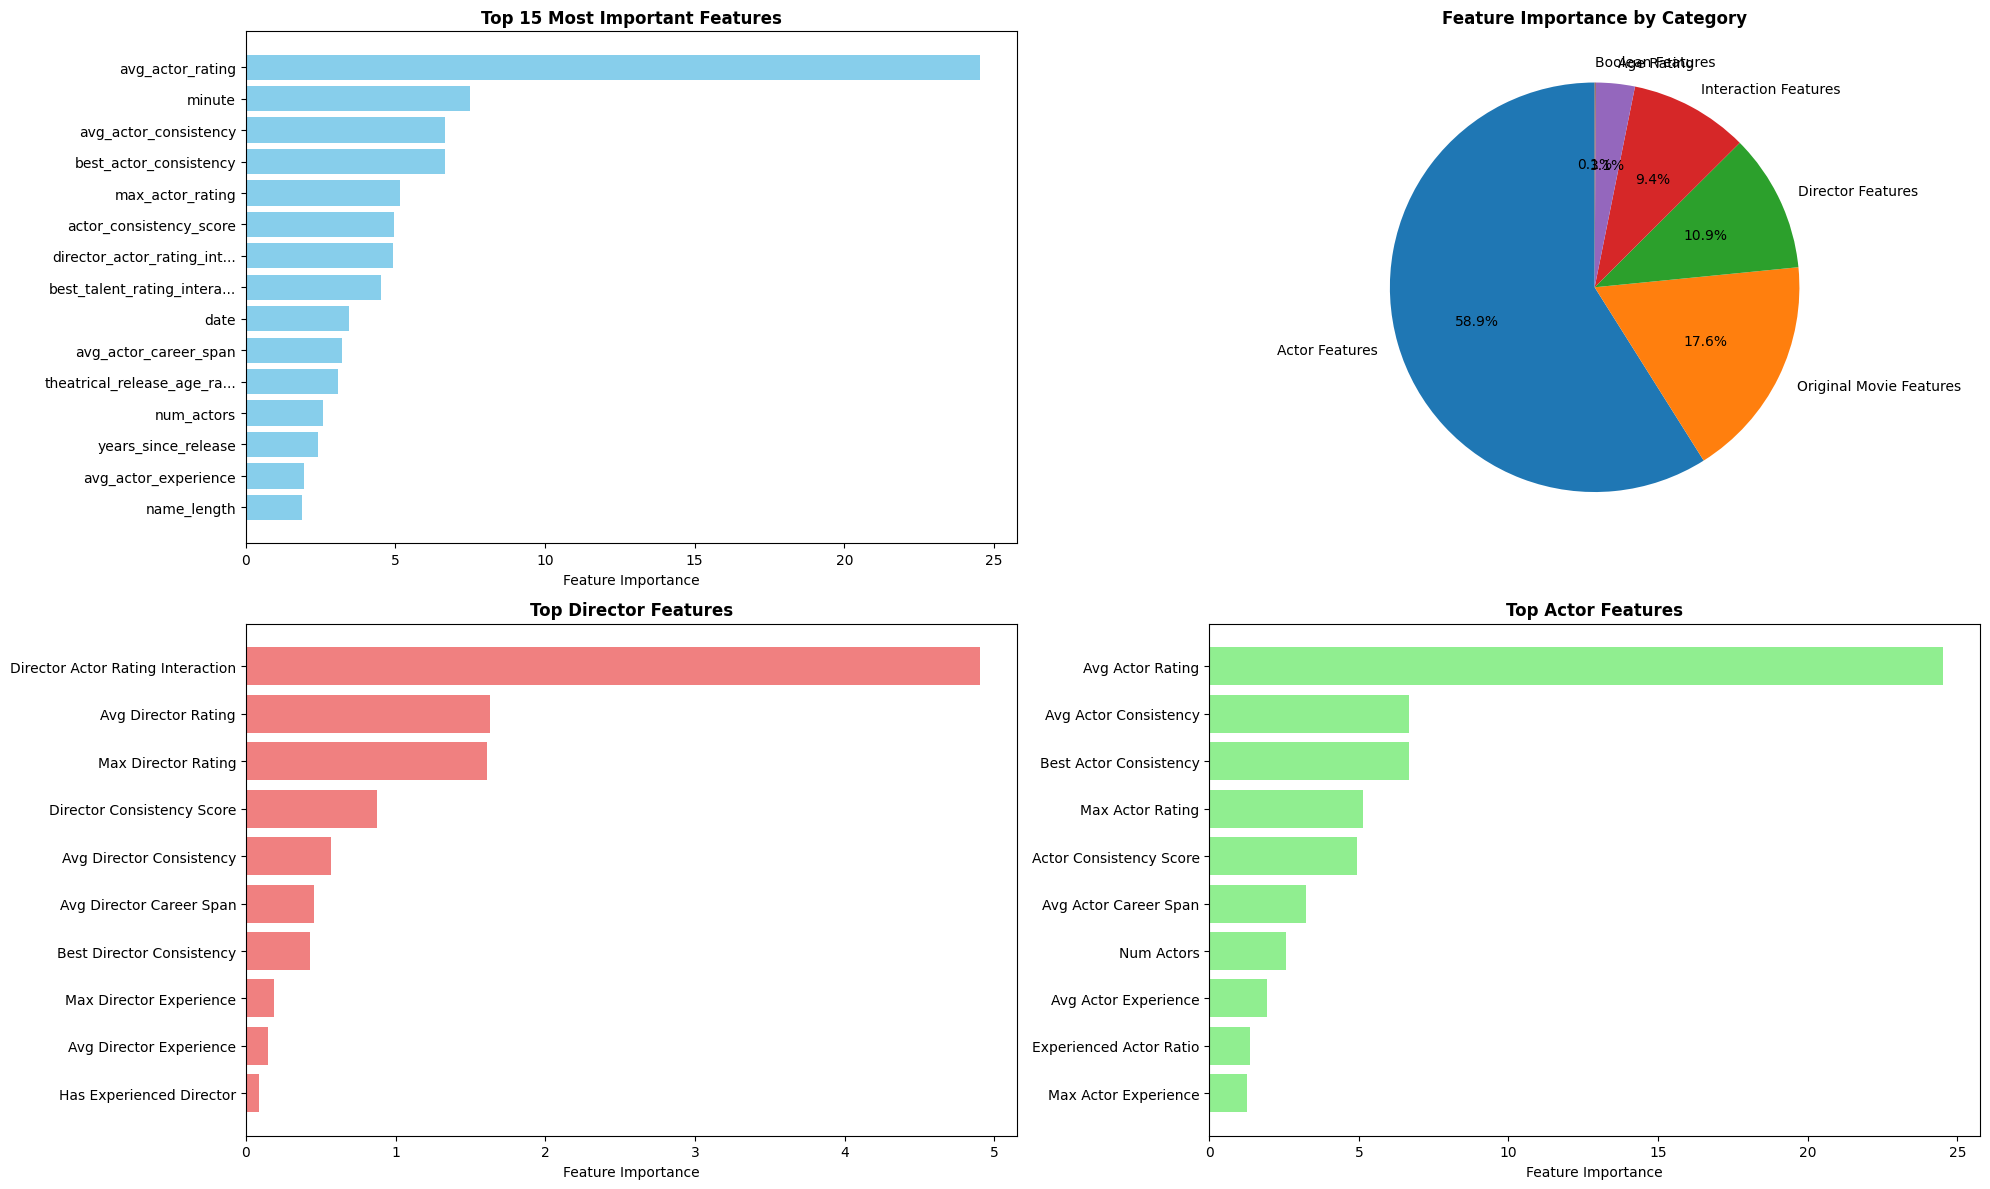


=== COMPARISON: NEW vs ORIGINAL FEATURES ===
Original features total importance: 17.6
New features total importance: 79.3
New features contribute 79.3% of total importance

Top 3 Original Features:
  1. minute                       7.48
  2. date                         3.45
  3. name_length                  1.87

Top 3 New Features:
  1. avg_actor_rating            24.53
  2. avg_actor_consistency        6.67
  3. best_actor_consistency       6.66


In [181]:
# Visualize Feature Importance
if best_model is not None:
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    
    # Top 15 features overall
    top_15 = importance_df.head(15)
    features = top_15['feature'].to_list()
    importances = top_15['importance'].to_list()
    
    axes[0, 0].barh(range(len(features)), importances, color='skyblue')
    axes[0, 0].set_yticks(range(len(features)))
    axes[0, 0].set_yticklabels([f[:25] + '...' if len(f) > 25 else f for f in features])
    axes[0, 0].set_xlabel('Feature Importance')
    axes[0, 0].set_title('Top 15 Most Important Features', fontweight='bold')
    axes[0, 0].invert_yaxis()
    
    # Feature importance by category
    cat_data = category_importance.to_pandas()
    axes[0, 1].pie(cat_data['total_importance'], labels=cat_data['category'], autopct='%1.1f%%', startangle=90)
    axes[0, 1].set_title('Feature Importance by Category', fontweight='bold')
    
    # Director features
    director_features = importance_df.filter(pl.col('category') == 'Director Features').head(10)
    if len(director_features) > 0:
        dir_features = director_features['feature'].to_list()
        dir_importances = director_features['importance'].to_list()
        axes[1, 0].barh(range(len(dir_features)), dir_importances, color='lightcoral')
        axes[1, 0].set_yticks(range(len(dir_features)))
        axes[1, 0].set_yticklabels([f.replace('_', ' ').title() for f in dir_features])
        axes[1, 0].set_xlabel('Feature Importance')
        axes[1, 0].set_title('Top Director Features', fontweight='bold')
        axes[1, 0].invert_yaxis()
    
    # Actor features
    actor_features = importance_df.filter(pl.col('category') == 'Actor Features').head(10)
    if len(actor_features) > 0:
        act_features = actor_features['feature'].to_list()
        act_importances = actor_features['importance'].to_list()
        axes[1, 1].barh(range(len(act_features)), act_importances, color='lightgreen')
        axes[1, 1].set_yticks(range(len(act_features)))
        axes[1, 1].set_yticklabels([f.replace('_', ' ').title() for f in act_features])
        axes[1, 1].set_xlabel('Feature Importance')
        axes[1, 1].set_title('Top Actor Features', fontweight='bold')
        axes[1, 1].invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    # Show comparison with original baseline features
    print(f"\n=== COMPARISON: NEW vs ORIGINAL FEATURES ===")
    original_features = ['date', 'minute', 'name_length', 'tagline_length', 'description_length', 'tagline_word_count', 'description_word_count']
    original_importance = importance_df.filter(pl.col('feature').is_in(original_features))
    new_features_importance = importance_df.filter(~pl.col('feature').is_in(original_features + ['theatrical_release_age_rating']))
    
    print(f"Original features total importance: {original_importance['importance'].sum():.1f}")
    print(f"New features total importance: {new_features_importance['importance'].sum():.1f}")
    print(f"New features contribute {(new_features_importance['importance'].sum() / importance_df['importance'].sum() * 100):.1f}% of total importance")
    
    # Show top new features vs top original features
    print(f"\nTop 3 Original Features:")
    for i, row in enumerate(original_importance.head(3).iter_rows(named=True)):
        print(f"  {i+1}. {row['feature']:<25} {row['importance']:>7.2f}")
        
    print(f"\nTop 3 New Features:")
    for i, row in enumerate(new_features_importance.head(3).iter_rows(named=True)):
        print(f"  {i+1}. {row['feature']:<25} {row['importance']:>7.2f}")
else:
    print("Cannot visualize feature importance without a trained model.")


In [177]:
# extra metrics for best model
y_pred = best_model.predict(X_val)
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"R2: {r2}, \nMAE: {mae}, \nRMSE: {rmse}")

R2: 0.5697318190442862, 
MAE: 0.3166983146234877, 
RMSE: 0.4071253439899354


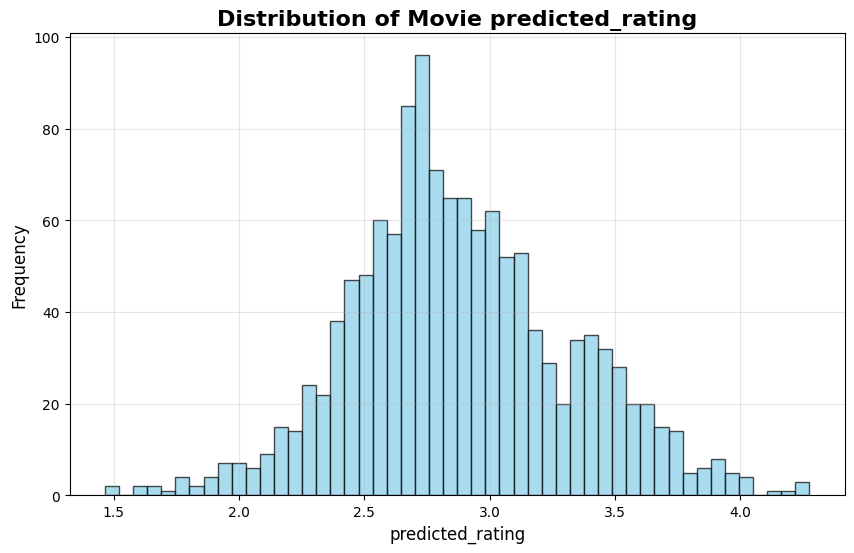

In [178]:
df_val_ = df_val_balanced.with_columns(pl.Series('predicted_rating', y_pred))
plot_distribution(df_val_, 'predicted_rating')

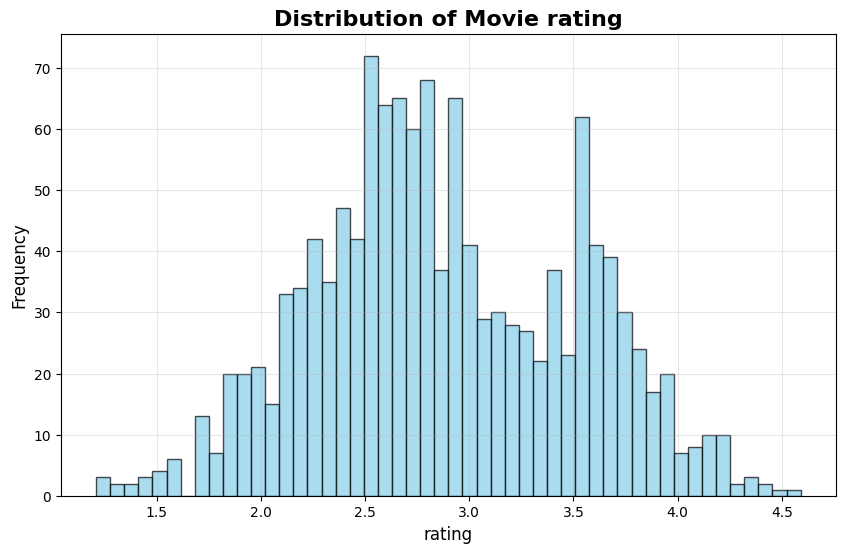

In [179]:
plot_distribution(df_val_balanced, 'rating')

In [141]:
print(f" min {min(y_pred)}:  max {max(y_pred)}, variance {np.var(y_pred)}") 

 min 2.362952154561032:  max 3.9291402245213147, variance 0.08132091021251332


In [142]:
# median prediction performance ( random baseline)
y_pred_baseline = [np.median(y_val)] * len(y_val)
r2 = r2_score(y_val, y_pred_baseline)
mae = mean_absolute_error(y_val, y_pred_baseline)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_baseline))
print(f"R2: {r2}, \nMAE: {mae}, \nRMSE: {rmse}")

R2: -1.7863712100663065e-06, 
MAE: 0.48650498338870435, 
RMSE: 0.5915956799242058


## Conclusion

We have slightly better than random model  and has problems with edge parts of rating distribution ->

In [143]:
df_val = df.filter(pl.col('date') >= 2015)
y_val = df_val.select('rating').to_numpy()
y_pred = best_model.predict(X_val)
df_val2 = df_val.with_columns(pl.Series('predicted_rating', y_pred)).head(10)
df_val2.select('name', 'date', 'rating', 'predicted_rating')

name,date,rating,predicted_rating
str,i64,f64,f64
"""Barbie""",2023,3.86,2.874713
"""Oppenheimer""",2023,4.23,3.516135
"""Joker""",2019,3.85,3.126412
"""Spider-Man: Into the Spider-Ve…",2018,4.42,3.040784
"""The Batman""",2022,3.98,3.278349
"""Knives Out""",2019,3.99,3.112465
"""Poor Things""",2023,4.05,3.440992
"""Spider-Man: Across the Spider-…",2023,4.45,3.361975
"""Spider-Man: No Way Home""",2021,3.84,3.200935
